<a href="https://colab.research.google.com/github/Lukasz2107/learning/blob/main/ML_by_TWT_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**how KNN algorithm works?** - it searches for the nearest neighbors

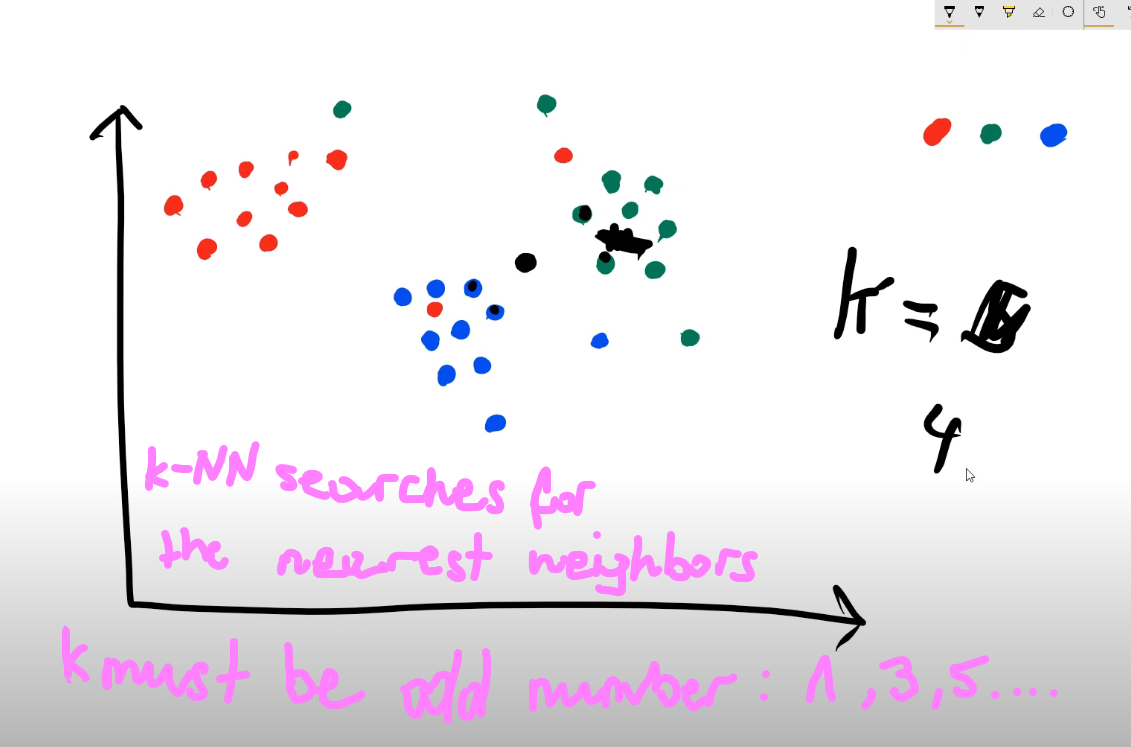

**in mathematical way:**

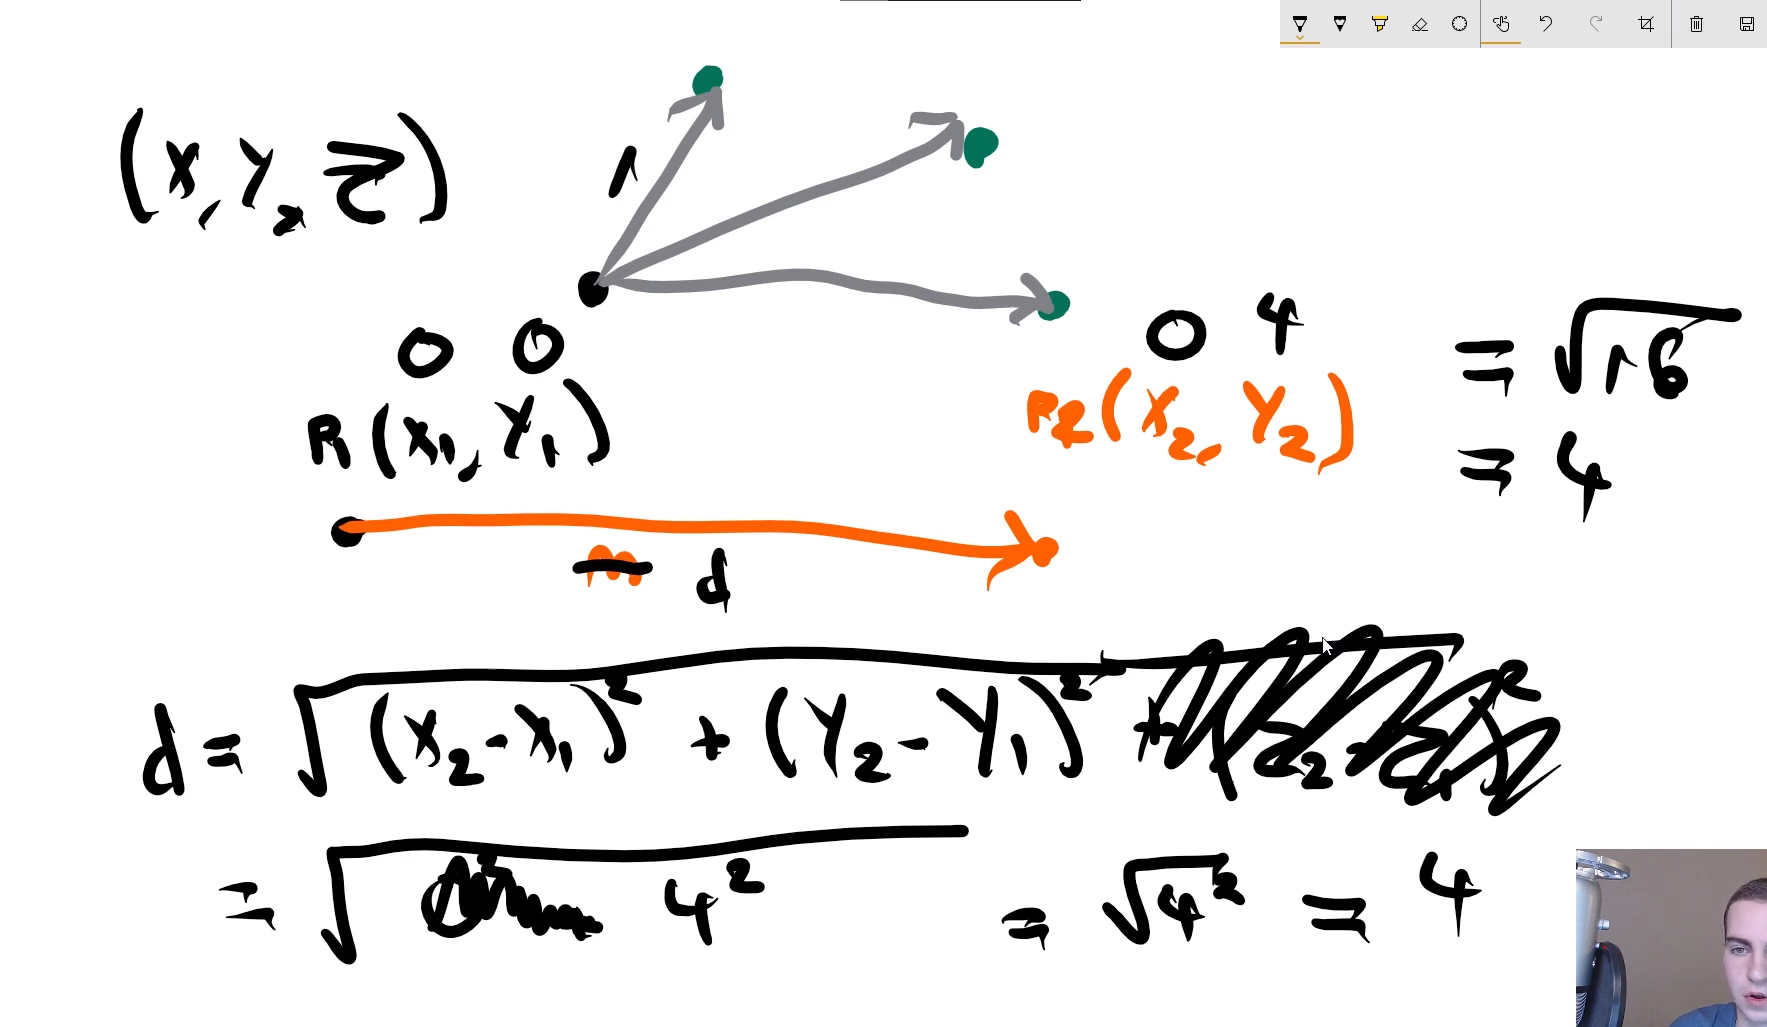

we cant pick too high value of k, because we can get not proper output


import libraries

In [18]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn import linear_model, preprocessing

  buying  maint door persons lug_boot safety  class
0  vhigh  vhigh    2       2    small    low  unacc
1  vhigh  vhigh    2       2    small    med  unacc
2  vhigh  vhigh    2       2    small   high  unacc
3  vhigh  vhigh    2       2      med    low  unacc
4  vhigh  vhigh    2       2      med    med  unacc


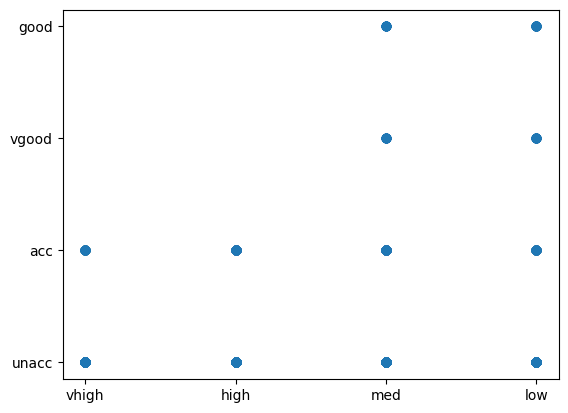

In [40]:
data = pd.read_csv("car.data")
pyplot.scatter(data["buying"], data["class"])

print(data.head())
le = preprocessing.LabelEncoder() # to encode data from for example: very high to int values


In [23]:
buying = le.fit_transform(list(data["buying"]))
maint = le.fit_transform(list(data["maint"]))
door = le.fit_transform(list(data["door"]))
persons = le.fit_transform(list(data["persons"]))
lug_boot = le.fit_transform(list(data["lug_boot"]))
safety = le.fit_transform(list(data["safety"]))
cls = le.fit_transform(list(data["class"]))

predict = "class"

In [67]:
x = list(zip(buying, maint, door, persons, lug_boot, safety))
y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [68]:
model = KNeighborsClassifier(n_neighbors=9) #pick a k value
model.fit(x_train, y_train)

acc = model.score(x_test, y_test)
print(acc)

0.9479768786127167


In [69]:
predicted = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]

for x in range(len(predicted)):
  print("Predicted: ", names[predicted[x]], "Data: ", x_test[x], "Actual: ", names[y_test[x]])
  n = model.kneighbors([x_test[x]], 9, True)
  print("N: ", n[1])

Predicted:  good Data:  (0, 3, 1, 2, 2, 0) Actual:  good
N:  [[1411  745 1471   62 1461   27  280 1371 1139]]
Predicted:  good Data:  (1, 2, 1, 1, 1, 1) Actual:  good
N:  [[ 820  772 1488 1062  352 1333  303   54  330]]
Predicted:  good Data:  (1, 2, 0, 1, 0, 1) Actual:  good
N:  [[ 138  525  724  752 1488 1235   91  960  253]]
Predicted:  good Data:  (2, 0, 1, 0, 2, 0) Actual:  good
N:  [[ 926 1212   87  677  925  156  765  870  872]]
Predicted:  unacc Data:  (2, 2, 3, 1, 1, 2) Actual:  unacc
N:  [[ 859  727 1379 1493 1326  942  400  821  831]]
Predicted:  unacc Data:  (1, 1, 1, 2, 1, 2) Actual:  acc
N:  [[ 234  458 1295  643  795  633  993  171  180]]
Predicted:  good Data:  (0, 2, 3, 0, 2, 0) Actual:  good
N:  [[ 198 1065 1394  555 1316  396  514  547 1092]]
Predicted:  good Data:  (0, 2, 2, 2, 0, 1) Actual:  good
N:  [[ 655 1251  823 1357  460 1237 1087  361  140]]
Predicted:  acc Data:  (1, 2, 2, 1, 2, 0) Actual:  acc
N:  [[1276  118  669 1170  725   47 1359 1547  330]]
Predicted: